In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler as smot

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [31]:
df = pd.read_csv("telescope_data.csv")
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [32]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [33]:
df["class"] = (df["class"] == "g").astype(int)

In [34]:

#df.head()

In [35]:
df.dtypes
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.7 MB


In [36]:
#df.hist(bins=40, figsize=(12, 10))


# **Data Visualizing**

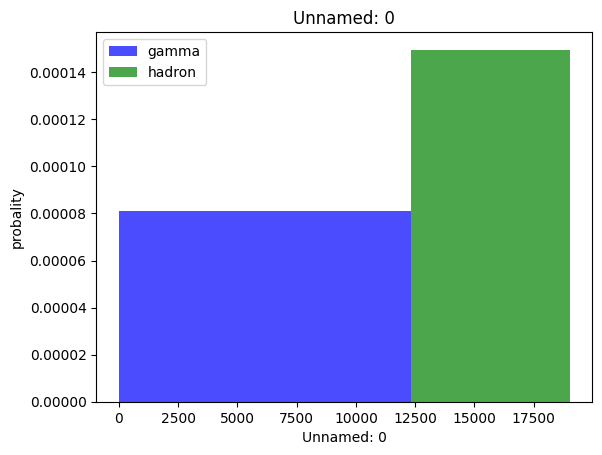

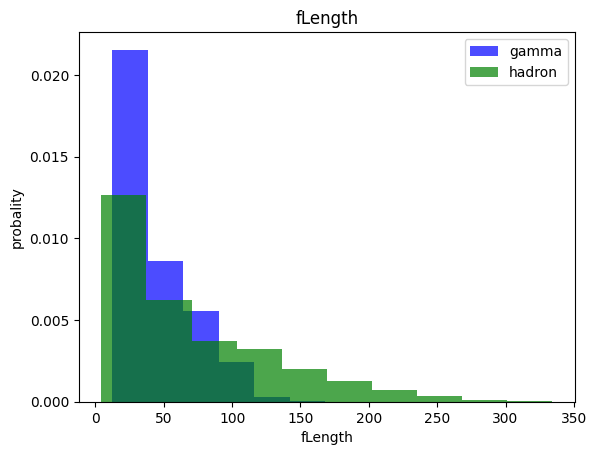

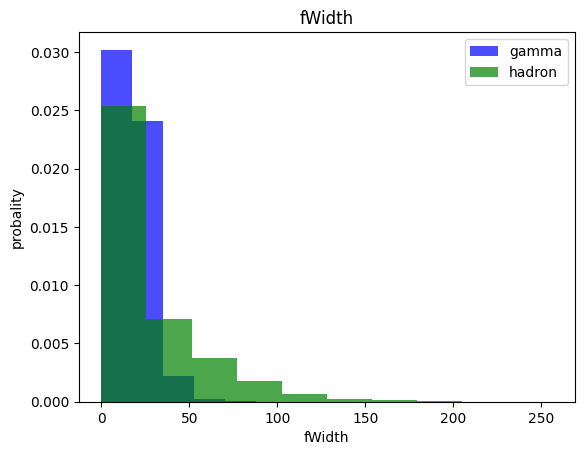

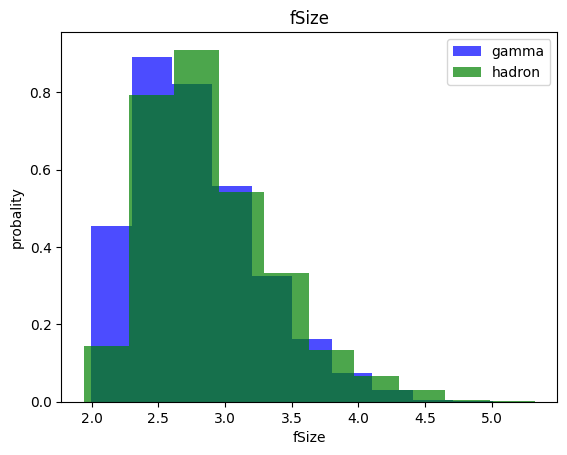

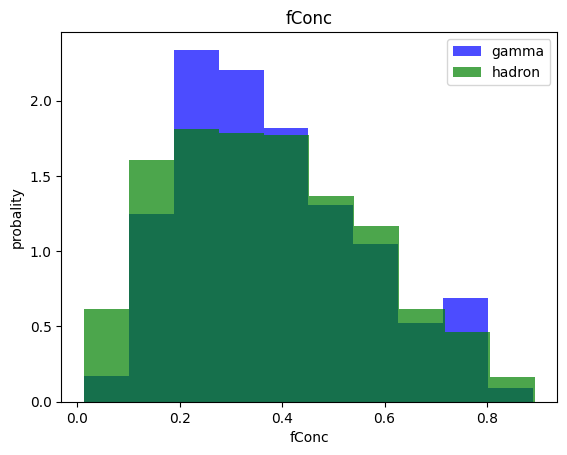

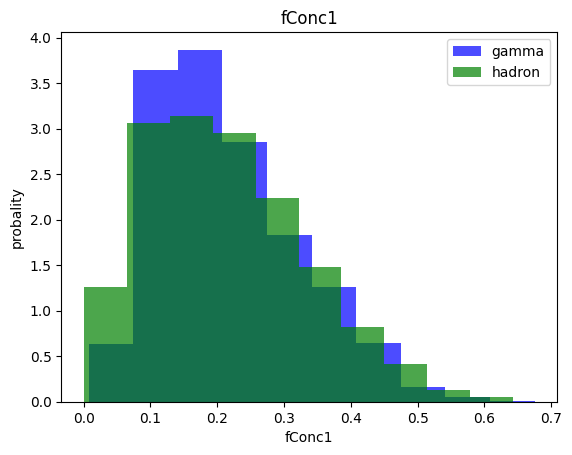

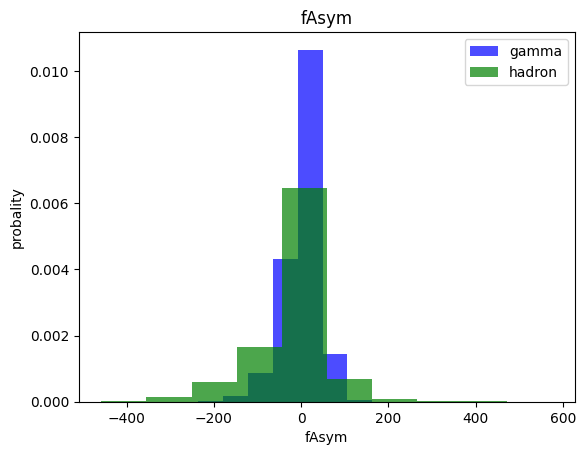

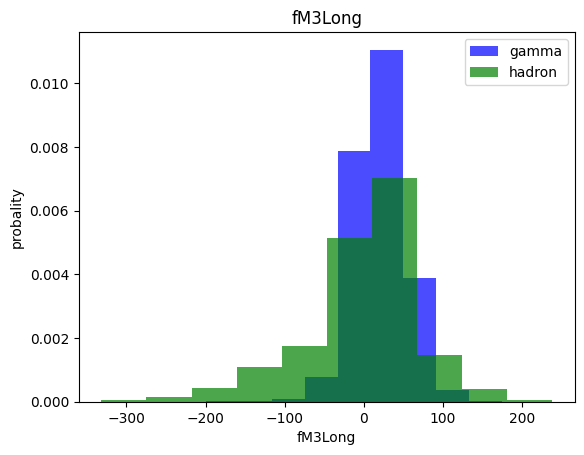

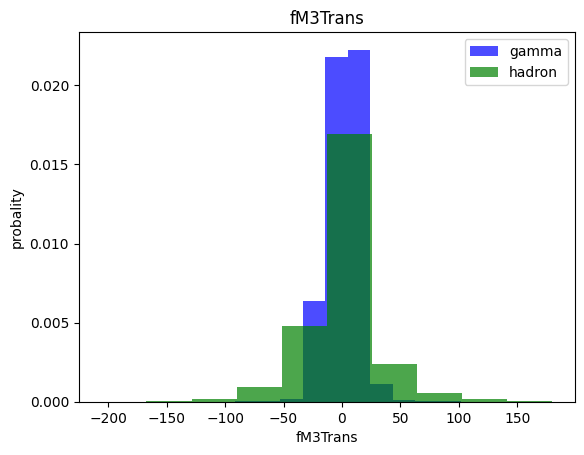

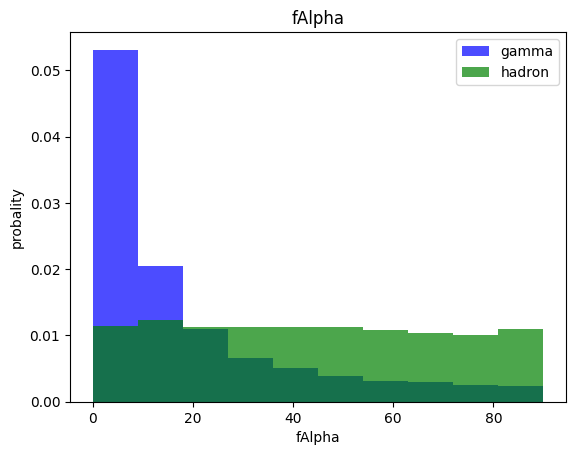

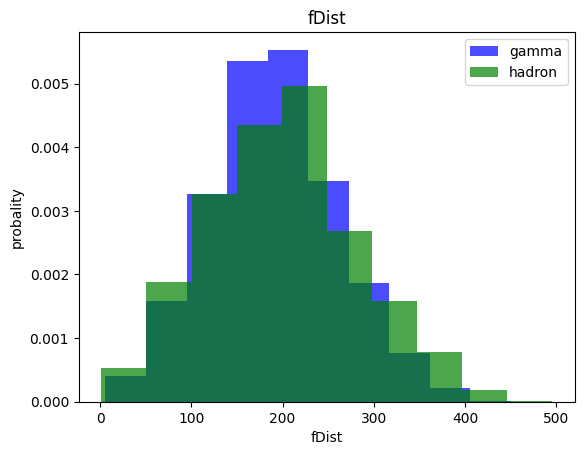

In [37]:
for label in df.columns[:-1]:
  plt.hist(df[df['class']==1][label],color = "blue",label = "gamma", alpha = 0.7 , density= True)
  plt.hist(df[df['class']==0][label],color = "green",label = "hadron", alpha = 0.7 , density= True)
  plt.title(label)
  plt.ylabel("probality")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# **Data Scalling**

In [38]:
def scale_dataset (dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  x = scalar.fit_transform(x)

  if oversample:
    ros = smot()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x,np.reshape(y, (-1, 1))))

  return data, x , y

# **Data Splitting**

In [39]:
train_df, validate_df, test_df = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

train, x_train, y_train = scale_dataset(train_df , oversample= True )
validate, x_validate, y_validate = scale_dataset(validate_df , oversample= False )
test, x_test, y_test = scale_dataset(test_df , oversample= False)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# **KNN Model**

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [41]:
y_pred = knn_model.predict(x_test)

In [42]:
print (classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1331
           1       0.98      0.98      0.98      2473

    accuracy                           0.97      3804
   macro avg       0.97      0.97      0.97      3804
weighted avg       0.97      0.97      0.97      3804



# **Navie Base**

In [43]:
from sklearn.naive_bayes import GaussianNB



In [46]:
nb_model = GaussianNB()
nb_model ==nb_model.fit(x_train, y_train)

GaussianNB()

In [48]:
y_pred2 = nb_model.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1331
           1       0.90      0.97      0.94      2473

    accuracy                           0.92      3804
   macro avg       0.92      0.89      0.90      3804
weighted avg       0.92      0.92      0.91      3804



In [ ]:
print